In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [31]:
from google.colab import files
uploaded = files.upload()
import io

dj_bus = pd.read_csv(io.StringIO(uploaded['최종데이터_5.csv'].decode('euc-kr')))    # 파일 불러오기
dj_bus.head()

Saving 최종데이터_5.csv to 최종데이터_5 (2).csv


,고유번호.ARS.,정류장,시군구명,읍면동명,유개승강장,차로위치,위치.BIT.,위도(lat),경도(lon),총인구수,...,대기시간,초승수합,환승수합,총승차객합계,400m_내_지하철역_수,400m_내_학교_수,400m_내_복지시설_수,400m_내_미세먼지인자_수,cluster_km,cluster_db
0,22250,대전충남병무청,중구,문화1동,장대형,일반차로,용두동 1-28 시민회관 앞/국제의료기 건너/병무청 앞,36.322648,127.415108,21766,...,8.43,442538,134862,577400,0,2,1,3,1,1
1,31590,코오롱아파트,서구,내동,구형,일반차로,서구내동214,36.334320,127.371082,23403,...,7.35,327902,132939,460841,0,5,1,4,1,1
2,13690,오투그란데아파트,동구,산내동,도시형,일반차로,대성동318-4번지,36.287637,127.464708,20193,...,8.46,313075,13740,326815,0,1,1,5,1,1
3,31570,롯데아파트,서구,내동,구형,일반차로,내동 220-2 롯데아파트상가 롯데쇼핑 앞,36.337680,127.366737,23403,...,7.31,253108,10080,263188,0,3,1,2,1,1
4,31610,서우아파트2단지,서구,내동,구형,일반차로,내동174(서우아파트201동건너),36.333342,127.372600,23403,...,8.60,164187,48475,212662,0,5,1,3,1,1


In [32]:
x = dj_bus[['총인구수','19세이하','65세이상','대기시간','초승수합','환승수합','총승차객합계',"400m_내_지하철역_수",'400m_내_학교_수','400m_내_복지시설_수','400m_내_미세먼지인자_수']]   #분석에 필요한 데이터만 추출

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(x)
X = pd.DataFrame(x_minmax,columns =['총인구수','19세이하','65세이상','대기시간','초승수합','환승수합','총승차객합계',"400m_내_지하철역_수",'400m_내_지하철역_수','400m_내_복지시설_수','400m_내_미세먼지인자_수'])

In [34]:
pca = PCA(random_state=1107)
x_p = pca.fit_transform(X)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.365175
1     0.529667
2     0.676595
3     0.778861
4     0.864144
5     0.934285
6     0.972709
7     0.988852
8     0.996029
9     1.000000
10    1.000000
dtype: float64

In [35]:
pca3 = PCA(n_components=5)
x_pp = pca3.fit_transform(X)

In [36]:
x_ppp = pd.DataFrame(data=x_pp,columns = ['PC1','PC2','PC3','PC4','PC5'])
x_pca = x_ppp.iloc[:,:5]
x_pca

,PC1,PC2,PC3,PC4,PC5
0,0.236951,0.247071,-0.049920,0.030773,0.039099
1,0.273764,0.166413,-0.114637,0.189857,0.226755
2,0.206073,0.247867,-0.076199,-0.035165,-0.039535
3,0.278205,0.201572,-0.113514,0.067188,0.101975
4,0.285586,0.144187,-0.144128,0.190194,0.207978
...,...,...,...,...,...
1155,-0.266136,0.521346,-0.289620,-0.015598,-0.071973
1156,-0.255010,0.490422,-0.216748,0.053324,-0.188400
1157,-0.601519,0.492852,-0.277961,-0.003846,-0.302125
1158,0.110599,0.880308,0.174641,0.366712,0.054056


GMM

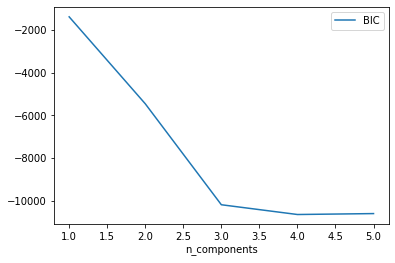

In [37]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 6)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(x_pca)
          for n in n_components]

plt.plot(n_components, [m.bic(x_pca) for m in models], label='BIC')
#plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [38]:
gmm = GaussianMixture(n_components = 5)
gmm_result = gmm.fit(x_pca)

In [39]:
gmm_labels = gmm.predict(x_pca)

In [40]:
x_pca['cluster_gmm'] = gmm_labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



군집별 개수

In [41]:
x['cluster_gmm'] = gmm_labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
x.groupby('cluster_gmm').count()

,총인구수,19세이하,65세이상,대기시간,초승수합,환승수합,총승차객합계,400m_내_지하철역_수,400m_내_학교_수,400m_내_복지시설_수,400m_내_미세먼지인자_수
cluster_gmm,,,,,,,,,,,
0,32,32,32,32,32,32,32,32,32,32,32
1,123,123,123,123,123,123,123,123,123,123,123
2,210,210,210,210,210,210,210,210,210,210,210
3,149,149,149,149,149,149,149,149,149,149,149
4,646,646,646,646,646,646,646,646,646,646,646


군집별 변수의 평균

In [43]:
x.groupby('cluster_gmm').mean()

,총인구수,19세이하,65세이상,대기시간,초승수합,환승수합,총승차객합계,400m_내_지하철역_수,400m_내_학교_수,400m_내_복지시설_수,400m_내_미세먼지인자_수
cluster_gmm,,,,,,,,,,,
0,18710.218750,2850.062500,2566.875000,9.521250,297013.406250,111845.437500,408858.843750,0.312500,0.468750,2.312500,9.562500
1,14823.959350,1634.528455,2886.504065,10.236016,181419.552846,49558.821138,230978.373984,0.000000,1.560976,0.853659,20.146341
2,18560.071429,2928.276190,3090.390476,9.164667,97697.671429,12388.114286,110085.785714,0.000000,2.328571,1.000000,3.328571
3,16299.590604,2720.248322,2416.476510,8.370671,328437.926174,121176.583893,449614.510067,0.966443,1.932886,0.322148,5.073826
4,19178.965944,3222.608359,2887.936533,9.683638,90999.227554,10757.365325,101756.592879,0.000000,2.512384,0.000000,2.752322


군집별 변수의 중앙값

In [45]:
x.groupby('cluster_gmm').median()

,총인구수,19세이하,65세이상,대기시간,초승수합,환승수합,총승차객합계,400m_내_지하철역_수,400m_내_학교_수,400m_내_복지시설_수,400m_내_미세먼지인자_수
cluster_gmm,,,,,,,,,,,
0,16554.0,2782.0,1872.0,9.425,156491.5,39272.5,223482.0,0.0,0.0,2.0,3.5
1,14318.0,1616.0,3130.0,8.570,91664.0,17825.0,112770.0,0.0,1.0,1.0,13.0
2,16213.0,2312.0,2974.0,8.970,83072.5,5981.0,94120.0,0.0,2.0,1.0,3.0
3,15315.0,2098.0,2317.0,8.040,181729.0,51573.0,223932.0,1.0,2.0,0.0,4.0
4,16909.0,2610.0,2792.0,8.810,63651.5,4037.5,69566.0,0.0,2.0,0.0,2.0


In [46]:
import plotly.express as px

fig = px.scatter_3d(
    x_pca, x='PC1', y='PC2', z='PC3',
    color = gmm_labels
)
fig.show()

In [47]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(x_pca, x_pca['cluster_gmm'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

silhouette_samples( ) return 값의 shape (1160,)


실루엣계수

In [48]:
x_pca['silhouette_coeff'] = score_samples

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
print('전체 군집의 실루엣 계수 평균')
average_score = silhouette_score(x_pca, x_pca['cluster_gmm'])
average_score

전체 군집의 실루엣 계수 평균


0.5680012369192533

In [50]:
average_score = silhouette_score(x_pca, x_pca['cluster_gmm'])
average_score

0.5680012369192533

In [51]:
X['cluster'] = gmm_labels
X.head()

,총인구수,19세이하,65세이상,대기시간,초승수합,환승수합,총승차객합계,400m_내_지하철역_수,400m_내_지하철역_수,400m_내_복지시설_수,400m_내_미세먼지인자_수,cluster
0,0.520718,0.588857,0.561516,0.039598,0.187539,0.162914,0.204662,0.0,0.181818,0.333333,0.036145,3
1,0.564677,0.566000,0.594837,0.030924,0.138950,0.160591,0.163342,0.0,0.454545,0.333333,0.048193,3
2,0.478477,0.574286,0.559136,0.039839,0.132666,0.016598,0.115829,0.0,0.090909,0.333333,0.060241,2
3,0.564677,0.566000,0.594837,0.030602,0.107249,0.012177,0.093274,0.0,0.272727,0.333333,0.024096,2
4,0.564677,0.566000,0.594837,0.040964,0.069560,0.058558,0.075362,0.0,0.454545,0.333333,0.036145,2


In [52]:
idx = X[X['cluster']==4].reset_index()['index']
group4 = dj_bus.iloc[idx]
group4['cluster_gmm'] = "4"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
idx = X[X['cluster']==3].reset_index()['index']
group3 = dj_bus.iloc[idx]
group3['cluster_gmm'] = "3"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
idx = X[X['cluster']==2].reset_index()['index']
group2 = dj_bus.iloc[idx]
group2['cluster_gmm'] = "2"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
idx = X[X['cluster']==1].reset_index()['index']
group1 = dj_bus.iloc[idx]
group1['cluster_gmm'] = "1"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
idx = X[X['cluster']==0].reset_index()['index']
group0 = dj_bus.iloc[idx]
group0['cluster_gmm'] = "0"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
real_result = pd.concat([group4,group3, group2, group1, group0], axis=0)

In [58]:
real_result

,고유번호.ARS.,정류장,시군구명,읍면동명,유개승강장,차로위치,위치.BIT.,위도(lat),경도(lon),총인구수,...,초승수합,환승수합,총승차객합계,400m_내_지하철역_수,400m_내_학교_수,400m_내_복지시설_수,400m_내_미세먼지인자_수,cluster_km,cluster_db,cluster_gmm
199,11610,대전보건대학,동구,가양1동,구형,일반차로,대전광역시 동구 가양2동 87-18 1001안경원앞,36.348353,127.450878,13203,...,462914,12264,475178,0,2,0,4,2,0,4
200,21120,부사오거리,중구,부사동,장대형,일반차로,부사동 150-11 seven앞,36.314048,127.434490,6683,...,409620,64152,473772,0,3,0,6,2,0,4
201,51320,증산도교육문화회관,대덕구,중리동,표준형,일반차로,중리동 409-1 일반건물(증산도) 증산도연수원 앞,36.359110,127.424895,19365,...,411861,44186,456047,0,3,0,3,2,0,4
203,52810,신탄진역,대덕구,신탄진동,장대형,일반차로,대전광역시 대덕구 신탄진동 143-20 신탄진역,36.449253,127.429258,14583,...,385831,49812,435643,0,1,0,0,2,0,4
206,32750,대전일보사,서구,월평1동,구형,일반차로,월평1동 29-1 육교옆 승강장,36.353623,127.360673,11327,...,332375,93350,425725,0,4,0,2,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,32230,둔산2동주민센터,서구,둔산1동,구형,일반차로,서구대덕대로234번길24(둔산동1336),36.353455,127.380882,16554,...,37449,3246,40695,0,1,2,3,0,-1,0
1143,32330,서구청,서구,둔산1동,표준형,일반차로,서구 둔산서로 100(둔산동 1300),36.355668,127.384077,16554,...,34405,6249,40654,0,0,2,0,0,-1,0
1154,10020,원동네거리,동구,중앙동,구형,일반차로,"원동 85-28 동구청,하나은행 앞",36.326290,127.433518,4329,...,20547,2527,23074,0,0,2,15,0,-1,0
1157,50560,체육재활원,대덕구,대화동,표준형,일반차로,대덕구 대화동 산 3-30,36.367813,127.418502,6812,...,8762,3440,12202,0,0,2,73,0,-1,0


In [59]:
real_result.to_csv('최종데이터_이게끝.csv',index=False,encoding='cp949')